In [25]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd

#data 불러오기
datas = pd.read_excel("C:/Users/multicampus/Desktop/ssafy2/data/data.xlsx")

values = datas.sample(frac=1).values

input_data = []
output_data = []

#"모른다"를 제외하고 input(대답 항목)과 output(MBTI)로 분류해서 append
for v in values:
    if "모른다" in v[9]:
        continue
    input_data.append(v[1:9])
    output_data.append(v[9])
    
# print(input_data)
# print(output_data)

pre_output = []
#우리가 예측한 값과 비교
for i in input_data:
    out = ""
    if i[0] + i[1] >= 5:
        out += "E"
    else:
        out += "I"
        
    if i[2] + i[3] >= 5:
        out += "N"
    else:
        out += "S"
        
    if i[4] + i[5] >= 5:
        out += "F"
    else:
        out += "T"
        
    if i[6] + i[7] >= 5:
        out += "P"
    else:
        out += "J"

    pre_output.append(out)
    
cnt_t = 0
cnt_f = 0
for i in range(0, len(pre_output)):
    if pre_output[i] == output_data[i]:
        cnt_t += 1
    else:
        cnt_f += 1

print("예측과 맞은 값 : "+ str(cnt_t) +", 예측과 틀린 값 : " + str(cnt_f))
# print(pre_output)
# print(output_data)
# print(input_data)


예측과 맞은 값 : 14, 예측과 틀린 값 : 72


In [11]:
import random

auto_input_data = []
auto_output_data = []
num_of_auto = 86 #임의로 만들 숫자

    
while "ISTP" not in auto_output_data or "ESTP" not in auto_output_data:
    for i in range(0, num_of_auto):
        temp = []
        for i in range(0, 8):
            temp.append(random.randrange(1,5))

        auto_input_data.append(temp)

        out = ""
        if temp[0] + temp[1] >= 5:
            out += "E"
        else:
            out += "I"

        if temp[2] + temp[3] >= 5:
            out += "N"
        else:
            out += "S"

        if temp[4] + temp[5] >= 5:
            out += "F"
        else:
            out += "T"

        if temp[6] + temp[7] >= 5:
            out += "P"
        else:
            out += "J"

        auto_output_data.append(out)
    

In [12]:
input_data = input_data * 5
output_data = output_data * 5

print(len(input_data))

430


In [13]:
input_data += auto_input_data
output_data += auto_output_data

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.20, random_state=1)

In [15]:
from sklearn.model_selection import GridSearchCV

c_range = [0.1, 1.0, 10.0]
gamma_range = [1, 0.5, 0.1]
param_grid = [{'C': c_range,
               'kernel': ['linear']},
              {'C': c_range,
               'gamma': gamma_range,
               'kernel': ['rbf']}]

gs = GridSearchCV(estimator = svm,
                  param_grid = param_grid,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = 8)

gs = gs.fit(input_data, output_data)
print(gs.cv_results_)
print("Best score : {}".format(gs.best_score_))
print("Best parameter : {}".format(gs.best_params_))

NameError: name 'svm' is not defined

In [16]:
#학습
ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(train_input, train_output)

lr = LogisticRegression(C=0.1, random_state=1)
lr.fit(train_input, train_output)


svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10)
svm.fit(train_input, train_output)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=10, gamma=0.1, random_state=1)

In [24]:
svm.predict([[1,2,3,1,4,2,1,3]])[0]

'ISTJ'

In [19]:
#결과
y_pred_ppn = ppn.predict(test_input)
y_pred_lr = lr.predict(test_input)
y_pred_svm = svm.predict(test_input)



In [22]:
y_pred_svm

array(['ENTJ', 'ISFJ', 'ENTP', 'ENFP', 'ESFP', 'ENFJ', 'ENTJ', 'ENTP',
       'INFJ', 'ENTP', 'ISFP', 'INTP', 'INFP', 'INFJ', 'ISFJ', 'ENFP',
       'ISTJ', 'ENTJ', 'ISTP', 'ENTP', 'ESFJ', 'ESFJ', 'ESTJ', 'ENTP',
       'ESTJ', 'ENTP', 'INTP', 'INTJ', 'ISFJ', 'INFJ', 'ESFP', 'ESFJ',
       'ENTP', 'INTP', 'ESTJ', 'ENTJ', 'ENTJ', 'ENFJ', 'ISFJ', 'INTJ',
       'ESFJ', 'ISFJ', 'ENTJ', 'ISFJ', 'ENTP', 'ESFJ', 'INTP', 'ENFP',
       'INFJ', 'ISFP', 'ENFJ', 'INFP', 'ISTJ', 'ESFJ', 'INTP', 'ISFJ',
       'ESFP', 'ISTJ', 'ESFP', 'ISFJ', 'ESFJ', 'ESFJ', 'ESFP', 'INTJ',
       'INFJ', 'INTP', 'INTJ', 'ENFJ', 'ENTJ', 'ENTJ', 'ENFP', 'ISFP',
       'ENFJ', 'ENFP', 'INFJ', 'ISFP', 'ESFJ', 'ENFP', 'INTP', 'ENFJ',
       'ENFJ', 'INTP', 'ESFP', 'ENFJ', 'ENTP', 'INFJ', 'ESFJ', 'INTP',
       'INTJ', 'ISTJ', 'ESTJ', 'ISFP', 'INFJ', 'ENTP', 'ESTJ', 'ESFP',
       'ESFJ', 'INTP', 'ESTJ', 'ISFP', 'ENTP', 'ESTJ', 'ESTJ', 'ESFP'],
      dtype='<U4')

In [20]:
from sklearn.metrics import accuracy_score

#성공율 추출
print('Accuracy: %.4f' % accuracy_score(test_output, y_pred_ppn))
print('Accuracy: %.4f' % accuracy_score(test_output, y_pred_lr))
print('Accuracy: %.4f' % accuracy_score(test_output, y_pred_svm))

Accuracy: 0.2885
Accuracy: 0.2596
Accuracy: 0.8750


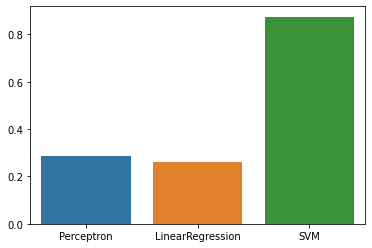

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.barplot(
    x= ['Perceptron', 'LinearRegression', 'SVM'],
    y= [accuracy_score(test_output, y_pred_ppn), accuracy_score(test_output, y_pred_lr), accuracy_score(test_output, y_pred_svm)],
)
plt.show()